# Q4

In [118]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## Import dataset

In [119]:
# import in google colab
!pip install --no-cache-dir gdown
!gdown 13XaS5G7bp7niH1hFaEIxoiJPzcTryJ7h

Downloading...
From: https://drive.google.com/uc?id=13XaS5G7bp7niH1hFaEIxoiJPzcTryJ7h
To: /content/data.csv
100% 527k/527k [00:00<00:00, 97.0MB/s]


## 1.

In [120]:
# read (in google colab)
df = pd.read_csv('data.csv')
df
'''
# read (in jupyter notebook)
df = pd.read_csv('data/data.csv')
df'''

"\n# read (in jupyter notebook)\ndf = pd.read_csv('data/data.csv')\ndf"

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [122]:
df.isnull().sum()
# df.dropna(inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## 2. correlation matrix

In [123]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [124]:
df['city'] = pd.factorize(df['city'])[0] + 1
df['street'] = pd.factorize(df['street'])[0] + 1
df['country'] = pd.factorize(df['country'])[0] + 1
df['statezip'] = pd.factorize(df['statezip'])[0] + 1

In [125]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1,1,1,1
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2,2,2,1
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3,3,3,1
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4,4,4,1
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,4521,2,1,1
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,4522,4,13,1
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4523,19,35,1
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,4524,2,66,1


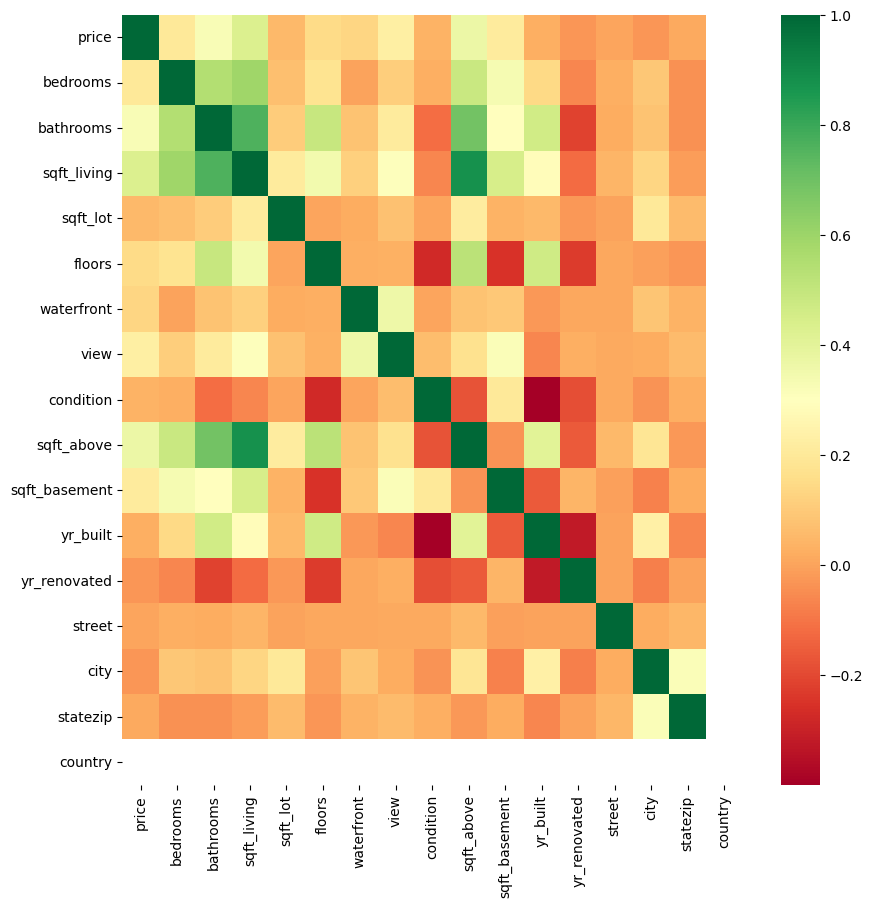

In [126]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

In [127]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
statezip         0.014182
street           0.003030
yr_renovated    -0.028774
city            -0.033270
country               NaN
Name: price, dtype: float64

## 3.

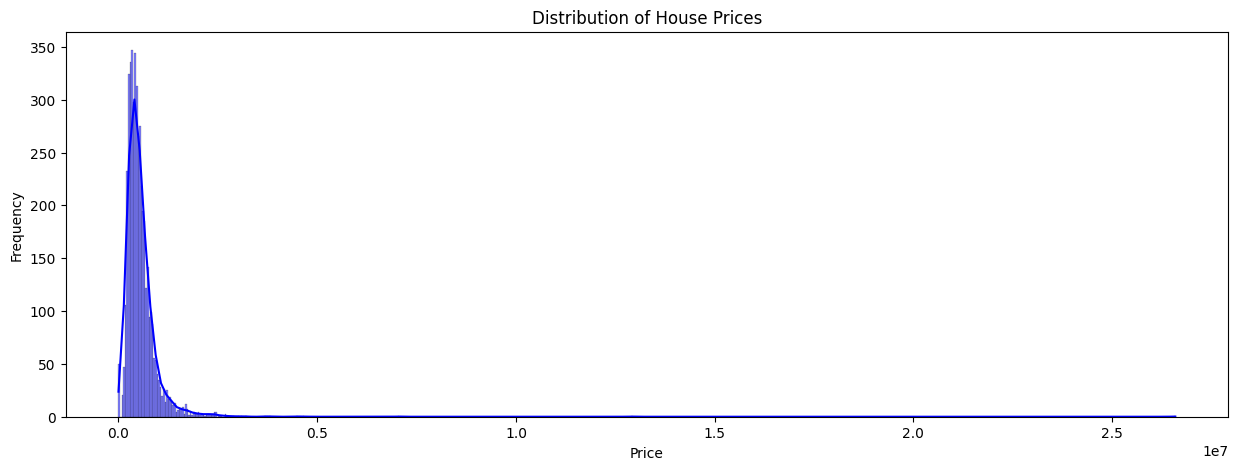

In [128]:
plt.figure(figsize=(15, 5))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

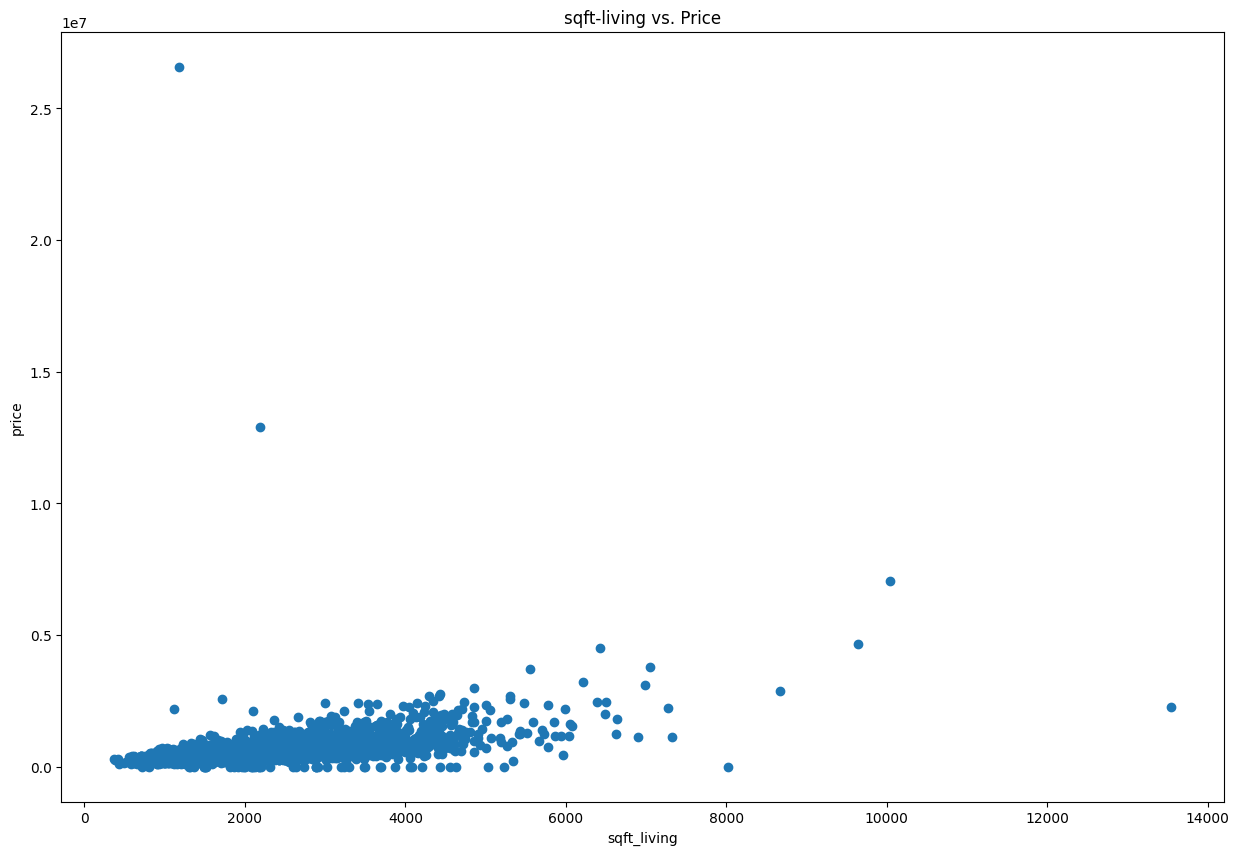

In [129]:
plt.figure(figsize=(15, 10))
plt.scatter(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living')
plt.title('sqft-living vs. Price')
plt.ylabel('price')
plt.show()

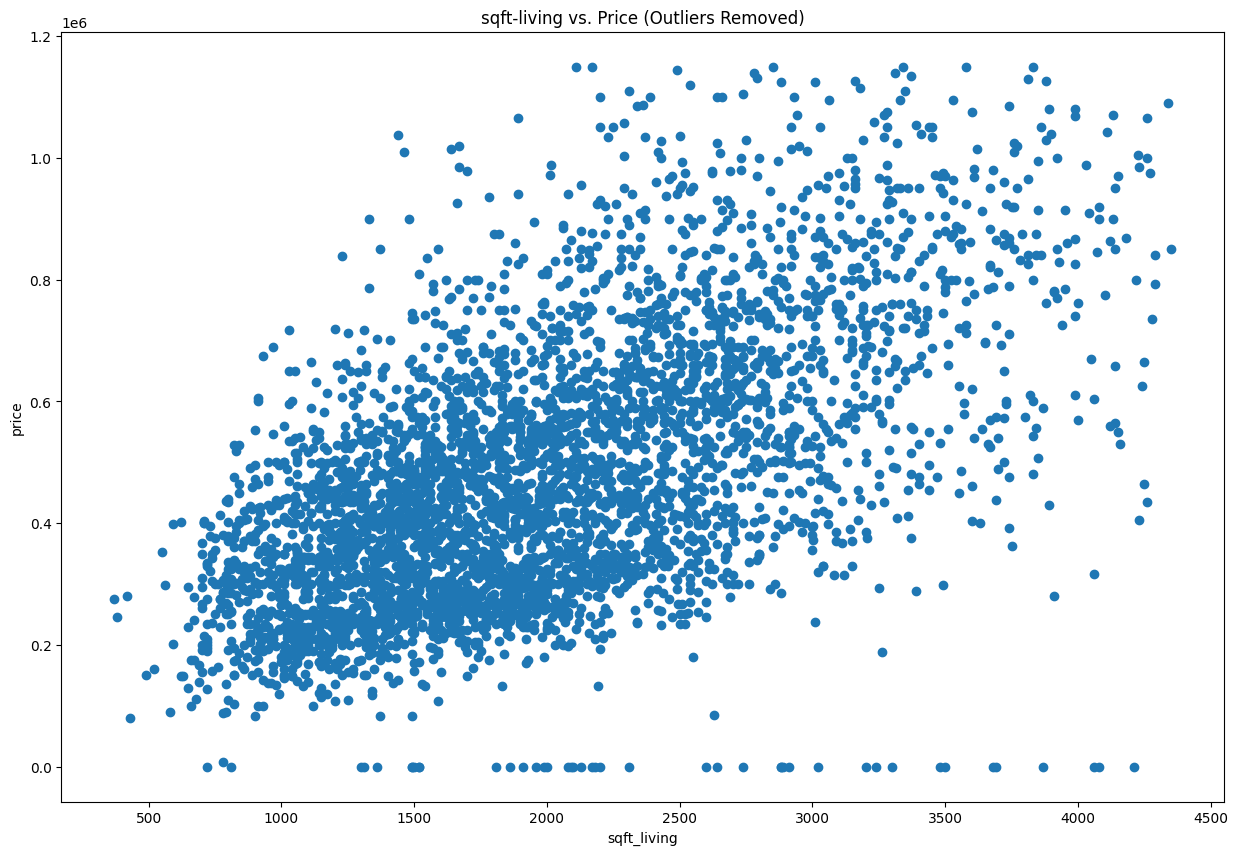

In [130]:
Q1_sqft = df['sqft_living'].quantile(0.25)
Q3_sqft = df['sqft_living'].quantile(0.75)
IQR_sqft = Q3_sqft - Q1_sqft
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_sqft = Q1_sqft - 1.5 * IQR_sqft
upper_bound_sqft = Q3_sqft + 1.5 * IQR_sqft
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
# حذف داده‌های پرت
filtered_df = df[(df['sqft_living'] >= lower_bound_sqft) & (df['sqft_living'] <= upper_bound_sqft) &
                 (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

# رسم نمودار پس از حذف داده‌های پرت
plt.figure(figsize=(15, 10))
plt.scatter(x='sqft_living', y='price', data=filtered_df)
plt.xlabel('sqft_living')
plt.title('sqft-living vs. Price (Outliers Removed)')
plt.ylabel('price')
plt.show()

## 4.

In [131]:
df['date']

0       2014-05-02 00:00:00
1       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4600, dtype: object

In [132]:
df['date'] = df['date'].str.replace('-' , ',' , 1)

# year
def a(date):
    if ',' in date:
        return date.split(',')[0].strip()
    else:
        return 'unknown'

# month
def b(date):
    if ',' in date:
        return date.split(',')[1].split('-')[0].strip()
    else:
        return 'unknown'

df['year'] = df['date'].apply(a)
df['month'] = df['date'].apply(b)
df.drop(['date'], axis=1, inplace=True)

In [133]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1,1,1,1,2014,05
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2,2,2,1,2014,05
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3,3,3,1,2014,05
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4,4,4,1,2014,05
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5,5,5,1,2014,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,4521,2,1,1,2014,07
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,4522,4,13,1,2014,07
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4523,19,35,1,2014,07
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,4524,2,66,1,2014,07


## 5.

In [134]:
x = df.drop(["price"], axis=1)
Y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=93)

In [135]:
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

## 6.

In [136]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))

In [137]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train_scaled, y_train_scaled, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

29/29 [==============================] - 0s 2ms/step - loss: 1.7426e-04
R^2 Score: 0.000174262750078924


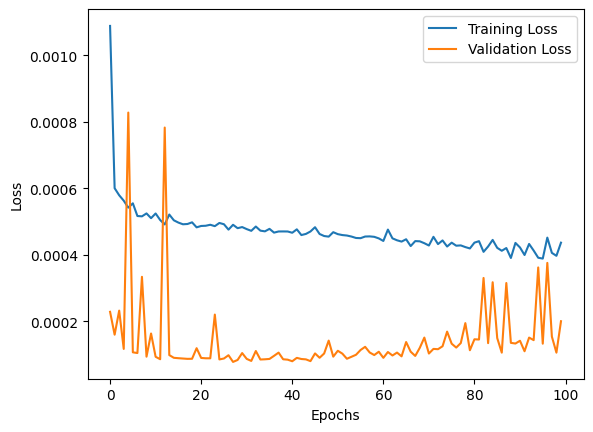

In [138]:
#Evaluate the model
loss = model.evaluate(x_test_scaled , y_test_scaled)
print(f'R^2 Score: {loss}')

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

29/29 [==============================] - 0s 1ms/step
R^2 Score: 0.30620705087421807


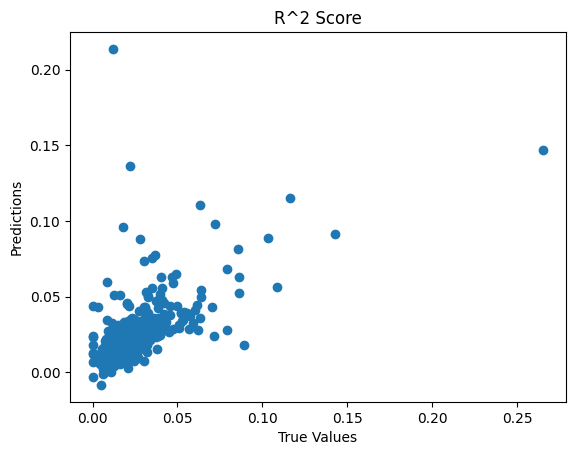

In [151]:
y_pred = model.predict(x_test_scaled)
rscore = r2_score(y_test_scaled , y_pred)
print(f'R^2 Score: {rscore}')

plt.scatter(y_test_scaled, y_pred)
plt.title('R^2 Score')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## 7.

In [142]:
model_2 = Sequential()
model_2.add(Dense(20, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model_2.add(Dense(30, activation='relu'))
model_2.add(Dense(1, activation='linear'))
model_2.compile(optimizer = 'sgd',loss = 'mae')
history = model_2.fit(x_train_scaled, y_train_scaled, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

29/29 [==============================] - 0s 3ms/step - loss: 0.0102
R^2 Score: 0.010246527381241322


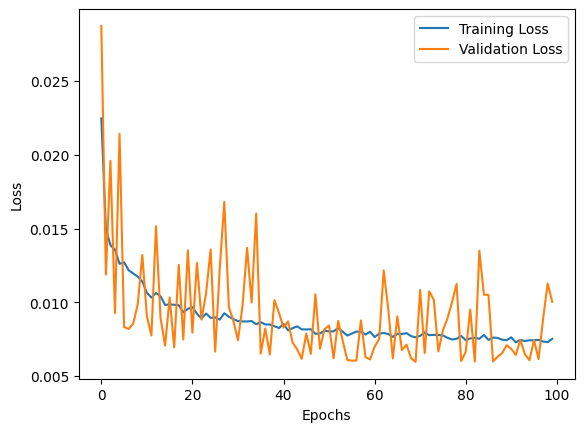

In [143]:
#Evaluate the model
loss = model_2.evaluate(x_test_scaled , y_test_scaled)
print(f'R^2 Score: {loss}')

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

29/29 [==============================] - 0s 3ms/step
R^2 Score: 0.2887858055444549


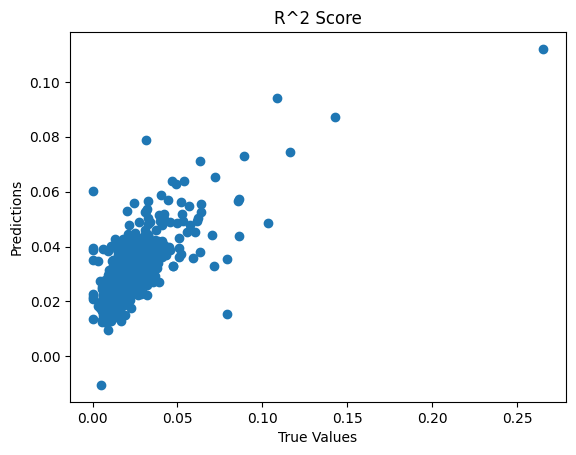

In [161]:
y_pred = model_2.predict(x_test_scaled)
rscore = r2_score(y_test_scaled , y_pred)
print(f'R^2 Score: {rscore}')

plt.scatter(y_test_scaled, y_pred)
plt.title('R^2 Score')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

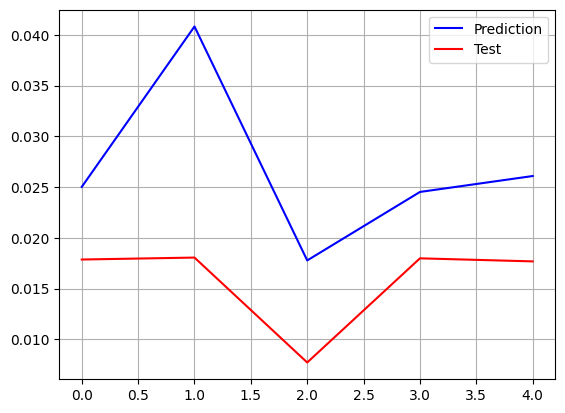

In [162]:
import random

random_pred = list()
random_test = list()

for i in range(5):
    j = random.randint(0, len(y_pred) - 1)  # Generate a random index
    random_pred.append(y_pred[j])  # Append y_pred_2 value at the random index j
    random_test.append(y_test_scaled[j])  # Append y_test value at the same random index j

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

In [163]:
for i in range(5):
    dis = random_pred[i] - random_test[i]
    print(dis)

[0.00716125]
[0.02278295]
[0.01006068]
[0.00654471]
[0.00841493]


In [165]:
random_pred2 = scaler.inverse_transform(random_pred)
random_test2 = scaler.inverse_transform(random_test)

In [167]:
for i in range(5):
    dis = random_pred2[i] - random_test2[i]
    print(dis)

[190417.54821539]
[605798.70305955]
[267513.55642453]
[174023.90804887]
[223753.10454518]
